In [2]:
import pandas as pd

In [6]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\IMDB-Movie-Data.csv")
print(df)

     Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley 

In [7]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [9]:
df.columns[df.isnull().any()]

Index(['Revenue (Millions)', 'Metascore'], dtype='object')

In [10]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [13]:
essential_columns = ["Title", "Rating", "Runtime (Minutes)", "Genre"]
print(df[essential_columns])

                       Title  Rating  Runtime (Minutes)  \
0    Guardians of the Galaxy     8.1                121   
1                 Prometheus     7.0                124   
2                      Split     7.3                117   
3                       Sing     7.2                108   
4              Suicide Squad     6.2                123   
..                       ...     ...                ...   
995     Secret in Their Eyes     6.2                111   
996          Hostel: Part II     5.5                 94   
997   Step Up 2: The Streets     6.2                 98   
998             Search Party     5.6                 93   
999               Nine Lives     5.3                 87   

                        Genre  
0     Action,Adventure,Sci-Fi  
1    Adventure,Mystery,Sci-Fi  
2             Horror,Thriller  
3     Animation,Comedy,Family  
4    Action,Adventure,Fantasy  
..                        ...  
995       Crime,Drama,Mystery  
996                    Horror  
997

In [14]:
average_runtime = df["Runtime (Minutes)"].mean()
print("Average runtime of movies:", average_runtime)

Average runtime of movies: 113.172


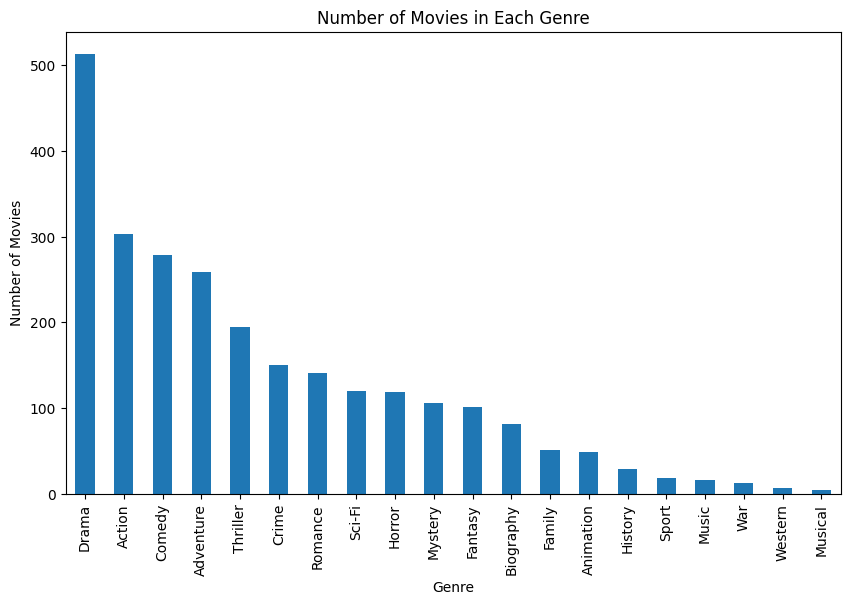

In [17]:
import matplotlib.pyplot as plt
genre_counts = df["Genre"].str.split(",", expand=True).stack().value_counts()
genre_counts.plot(kind="bar", figsize=(10, 6), title="Number of Movies in Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

In [18]:
director_counts = df["Director"].value_counts()
top_directors = director_counts.head(5)
print(top_directors)

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Name: count, dtype: int64


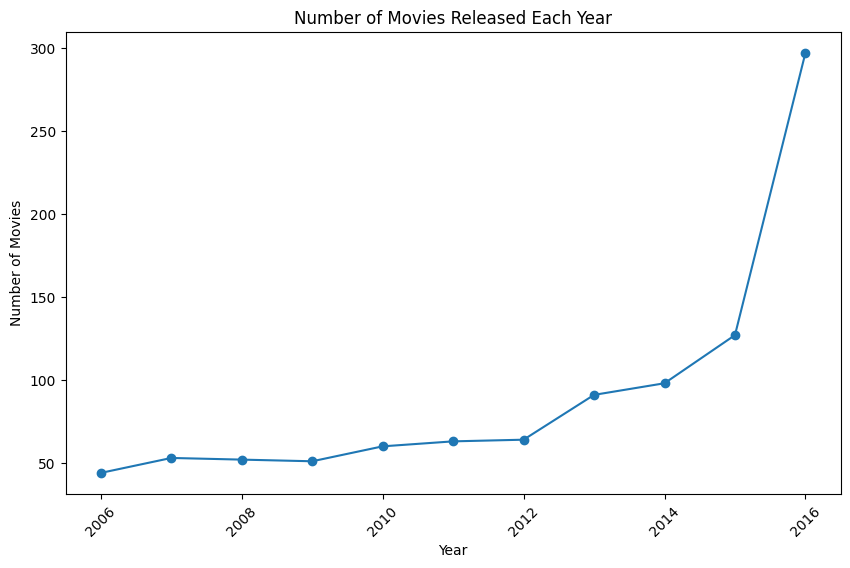

In [19]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df.dropna(subset=["Year"])

year_counts = df["Year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

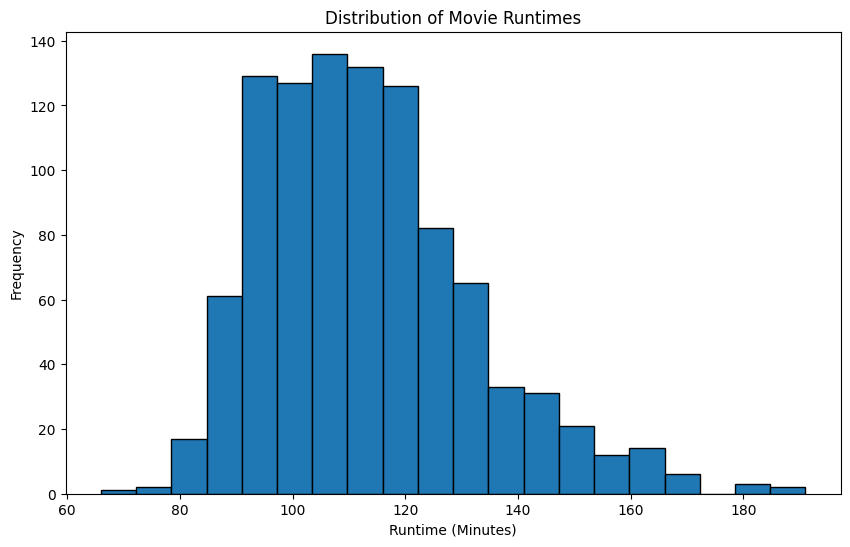

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df["Runtime (Minutes)"], bins=20, edgecolor='k')
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Frequency")
plt.show()

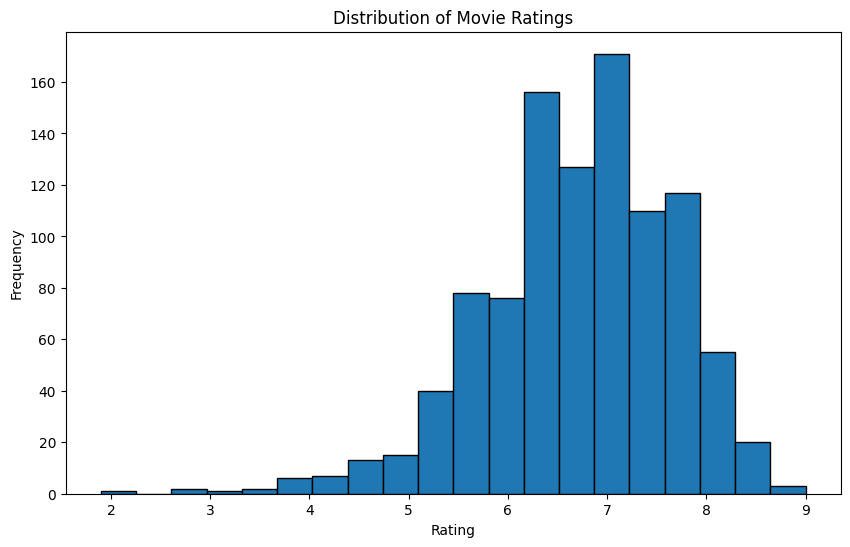

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df["Rating"], bins=20, edgecolor='k')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [22]:
correlation = df["Rating"].corr(df["Runtime (Minutes)"])
print("Correlation between Ratings and Runtimes:", correlation)

Correlation between Ratings and Runtimes: 0.3922142455250515


In [23]:
top_actors = df["Actors"].str.split(', ').explode().value_counts().head(3)
print(top_actors)

Actors
Mark Wahlberg    15
Brad Pitt        13
Hugh Jackman     13
Name: count, dtype: int64


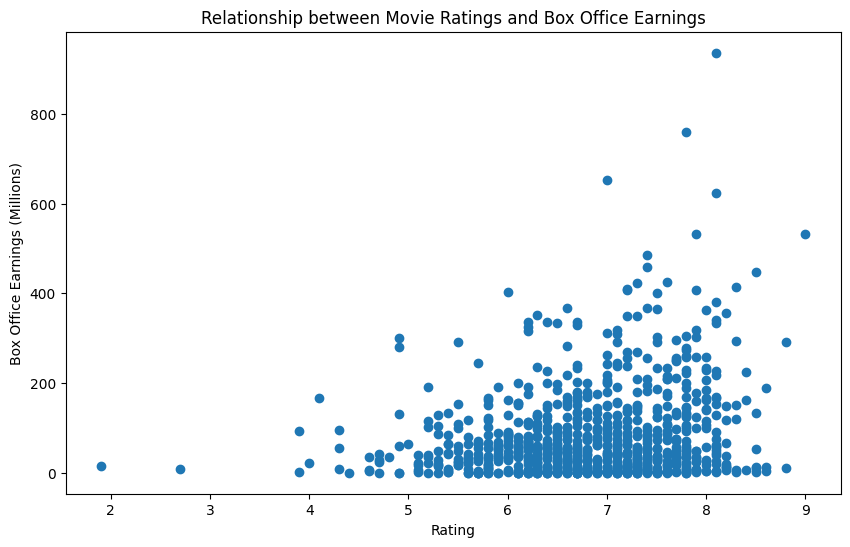

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Rating"], df["Revenue (Millions)"])
plt.title("Relationship between Movie Ratings and Box Office Earnings")
plt.xlabel("Rating")
plt.ylabel("Box Office Earnings (Millions)")
plt.show()

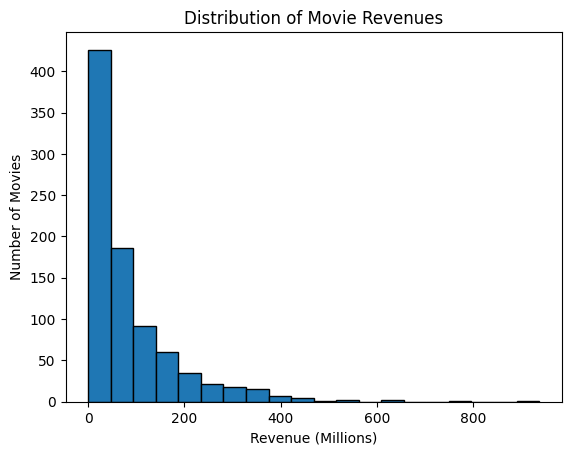

In [25]:
plt.hist(df['Revenue (Millions)'], bins=20, edgecolor='k')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Revenues')
plt.show()

In [26]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [27]:
df['Runtime (Minutes)'].mean()

113.172

In [28]:
list[df.columns]

list[Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')]

In [29]:
production_company_counts = df['Director'].value_counts()
highest_director = production_company_counts.idxmax()
print(f"The director with the highest number of movies is: {highest_director}")

The director with the highest number of movies is: Ridley Scott


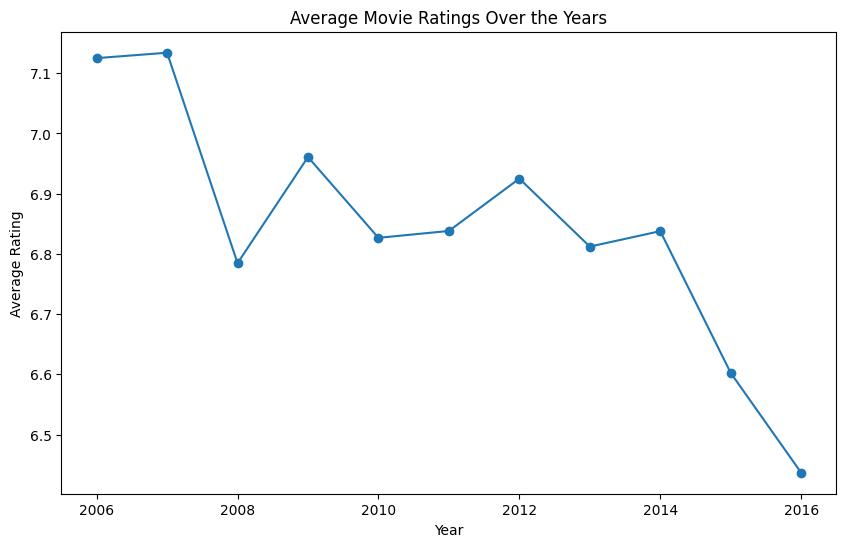

In [30]:
average_ratings_by_year = df.groupby('Year')['Rating'].mean()
average_ratings_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings Over the Years')
plt.show()

In [31]:
director_actor_pairs = df.groupby(['Director', 'Actors']).size().sort_values(ascending=False)
most_common_pair = director_actor_pairs.head(1)
print(most_common_pair)

Director     Actors                                              
Michael Bay  Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson    2
dtype: int64


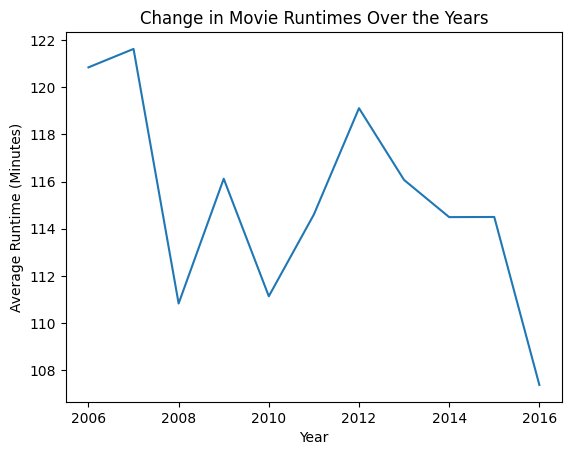

In [32]:
yearly_runtimes = df.groupby('Year')['Runtime (Minutes)'].mean()
plt.plot(yearly_runtimes.index, yearly_runtimes.values)
plt.xlabel('Year')
plt.ylabel('Average Runtime (Minutes)')
plt.title('Change in Movie Runtimes Over the Years')
plt.show()

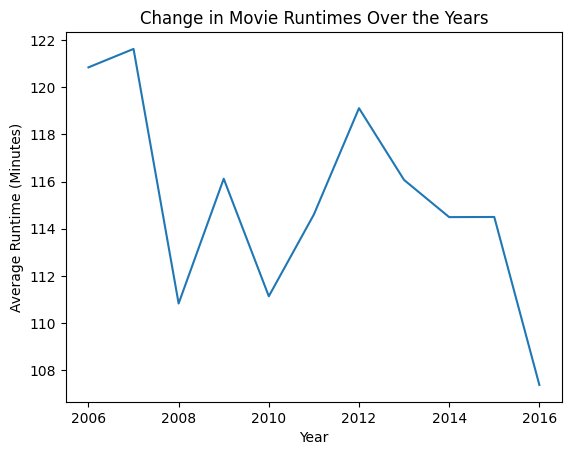

In [33]:
yearly_runtimes = df.groupby('Year')['Runtime (Minutes)'].mean()
plt.plot(yearly_runtimes.index, yearly_runtimes.values)
plt.xlabel('Year')
plt.ylabel('Average Runtime (Minutes)')
plt.title('Change in Movie Runtimes Over the Years')
plt.show()

In [34]:
from collections import Counter
keywords = Counter(" ".join(df['Description']).split()).most_common(10)
print("Top 10 Keywords from Movie Descriptions:")
print(keywords)

Top 10 Keywords from Movie Descriptions:
[('a', 1284), ('the', 1240), ('to', 933), ('of', 806), ('and', 712), ('in', 495), ('his', 479), ('A', 342), ('is', 294), ('with', 263)]


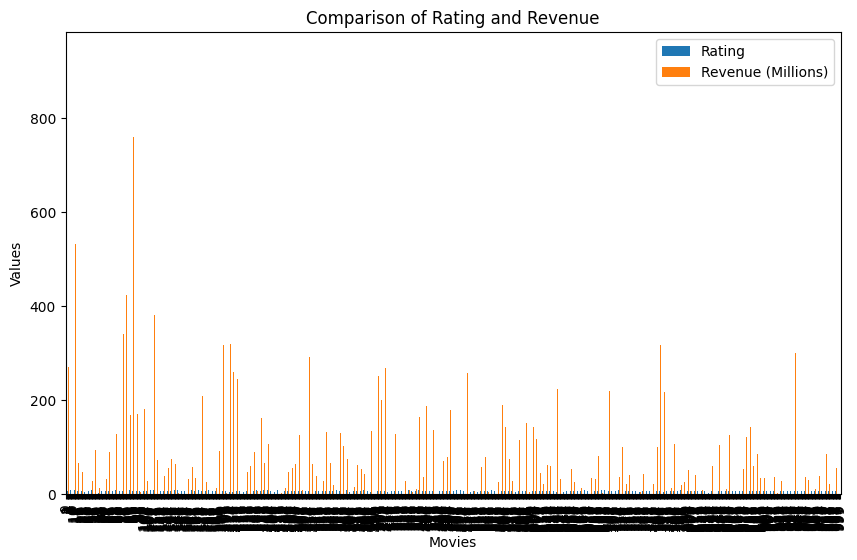

In [35]:
comparison_metrics = ['Rating', 'Revenue (Millions)']
df[comparison_metrics].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movies')
plt.ylabel('Values')
plt.title('Comparison of Rating and Revenue')
plt.show()

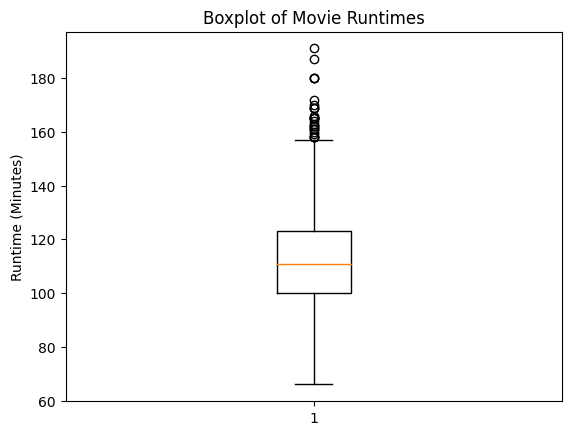

In [36]:
plt.boxplot(df['Runtime (Minutes)'])
plt.ylabel('Runtime (Minutes)')
plt.title('Boxplot of Movie Runtimes')
plt.show()

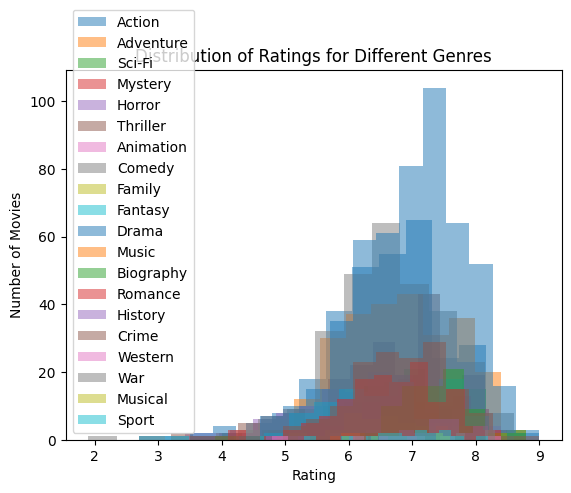

In [37]:
for genre in df['Genre'].str.split(',').explode().unique():
    genre_df = df[df['Genre'].str.contains(genre, na=False)]
    plt.hist(genre_df['Rating'], alpha=0.5, label=genre, bins=15)

plt.legend()
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Ratings for Different Genres')
plt.show()


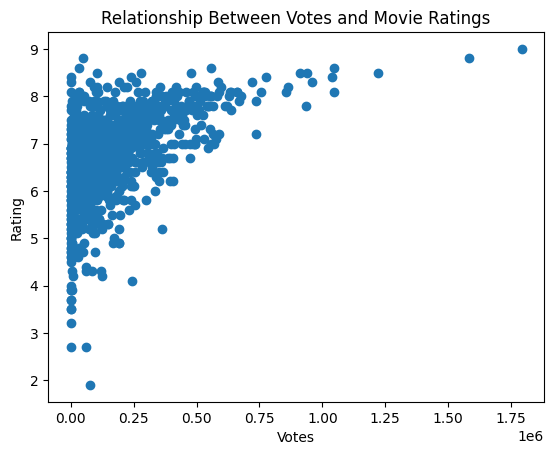

In [38]:
plt.scatter(df['Votes'], df['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relationship Between Votes and Movie Ratings')
plt.show()